<a href="https://colab.research.google.com/github/varshitha-123-tech/neural-networks/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setup
!pip install matplotlib numpy tensorflow


Load and Preprocess the Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


Build and Train the Autoencoder with an Extra Hidden Layer

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # smallest encoded representation

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.4670 - val_loss: 0.3177
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3124 - val_loss: 0.3070
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3028 - val_loss: 0.3005
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.2973 - val_loss: 0.2972
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2944 - val_loss: 0.2944
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.2918 - val_loss: 0.2926
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2897 - val_loss: 0.2910
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2883 - val_loss: 0.2902
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2880 - val_loss: 0.2888
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2864 - val_loss: 0.2877
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2850 - val_loss: 0.2868
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

 Visualize Original vs Reconstructed Test Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


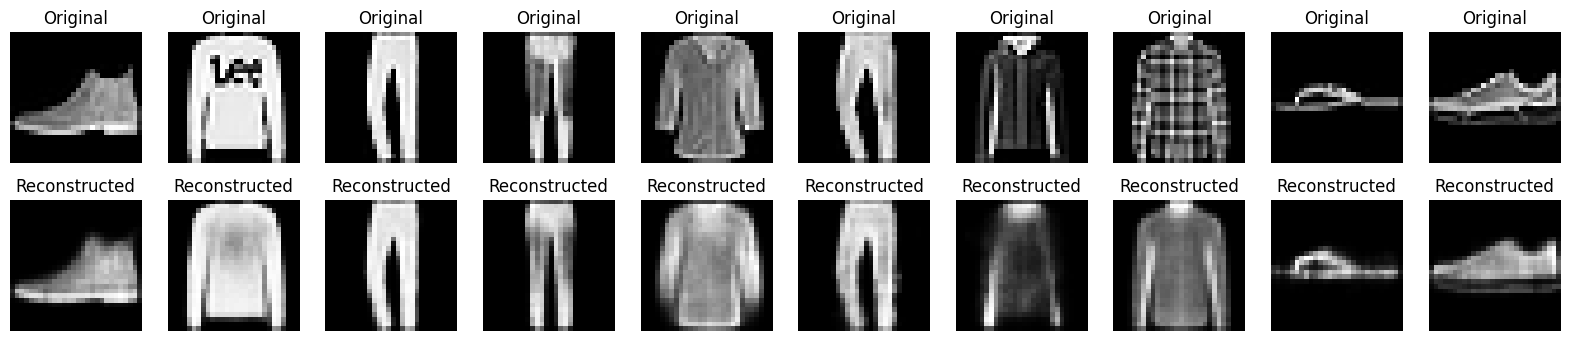

In [ ]:
# Predict on test set
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images side-by-side
n = 10  # how many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


Build and Train a Denoising Autoencoder

In [ ]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip values to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Build model
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history_denoise = denoising_autoencoder.fit(x_train_noisy, x_train,
                                            epochs=20,
                                            batch_size=256,
                                            shuffle=True,
                                            validation_data=(x_test_noisy, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.4778 - val_loss: 0.3441
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3343 - val_loss: 0.3243
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3204 - val_loss: 0.3204
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3148 - val_loss: 0.3154
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3112 - val_loss: 0.3118
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3095 - val_loss: 0.3098
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.3064 - val_loss: 0.3084
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3048 - val_loss: 0.3073
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3036 - val_loss: 0.3068
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.3022 - val_loss: 0.3051
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3009 - val_loss: 0.3047
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

Visualize Original, Noisy, and Reconstructed Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


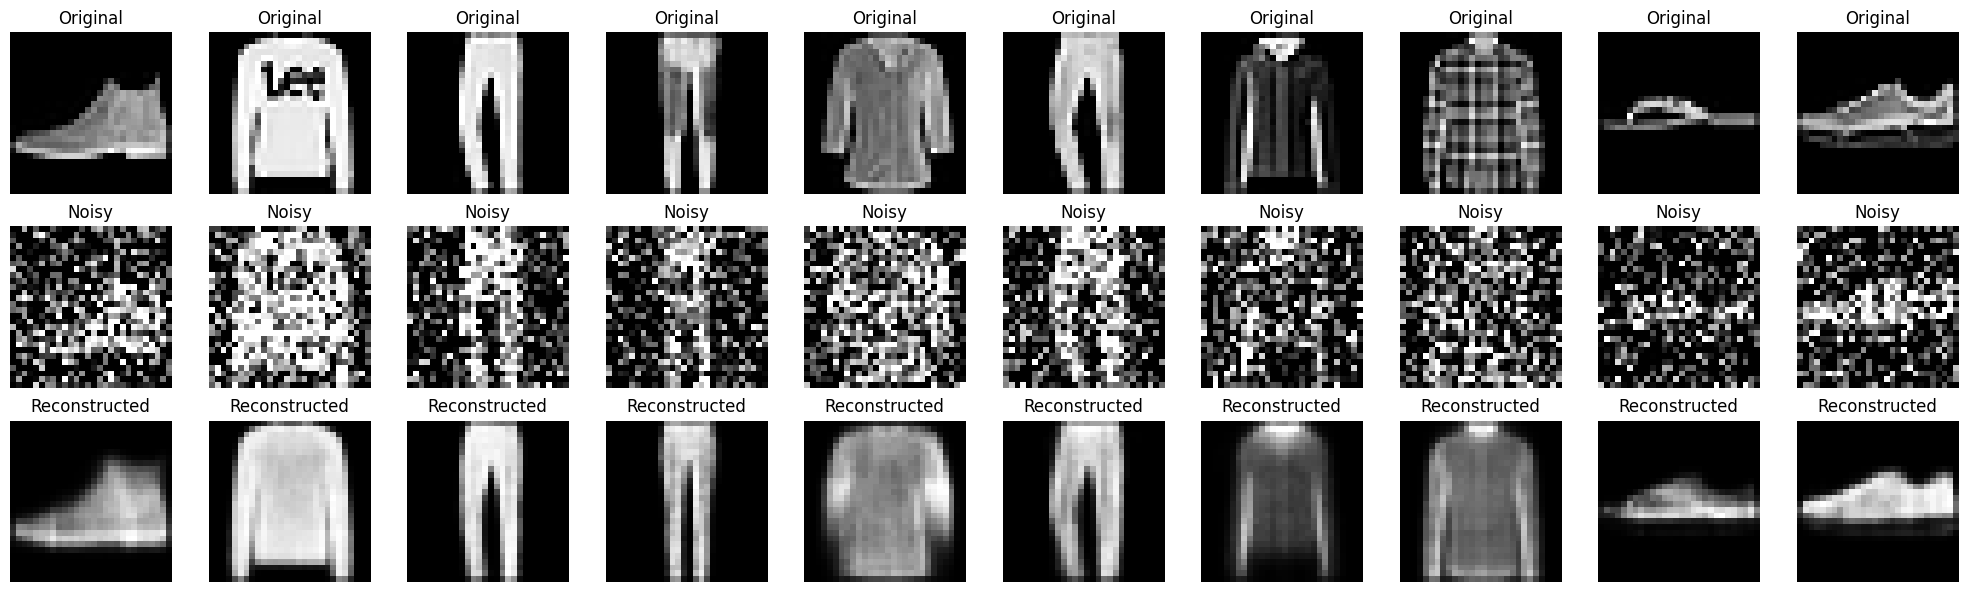

In [ ]:
# Predict the reconstructed images from noisy input
decoded_imgs_denoise = denoising_autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_denoise[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()


Plot Training and Validation Loss for Autoencoder and Denoising Autoencoder

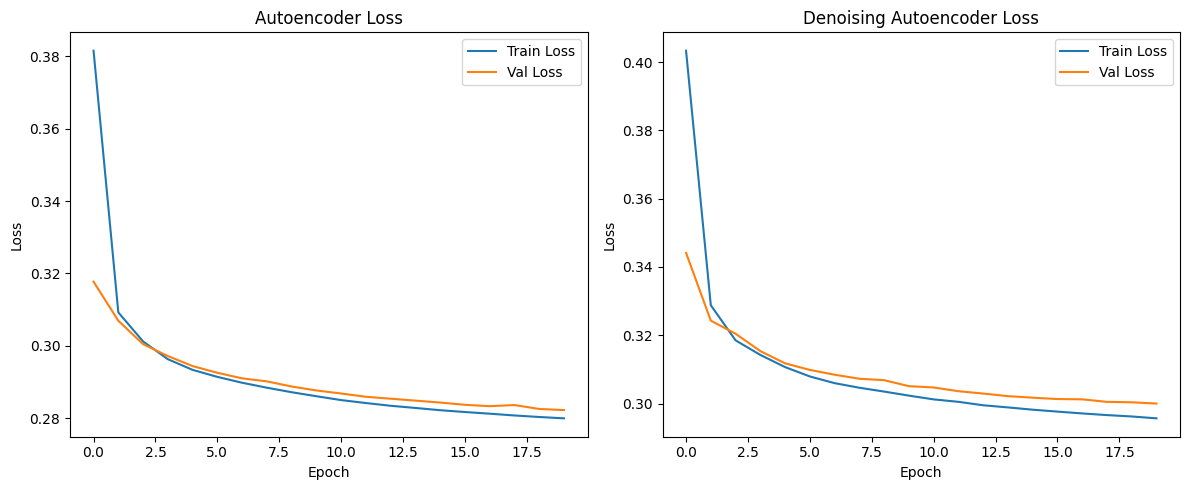

In [ ]:
# Plot training and validation loss for regular autoencoder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation loss for denoising autoencoder
plt.subplot(1, 2, 2)
plt.plot(history_denoise.history['loss'], label='Train Loss')
plt.plot(history_denoise.history['val_loss'], label='Val Loss')
plt.title("Denoising Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


video link : https://drive.google.com/file/d/1Z54WxPwXiZZ0NQGAEW3AAS59l-rrshKa/view?usp=drive_link
